# "Playing" with QGAN-HG (https://arxiv.org/abs/2104.00746)

## Before starting experimenting I've researched paper along with the article it refers to. Briefly looked at a dozen article links. Then found implementation of code from papers.

## After a lot of thinking about it, I generally understood how the code works. At this point I decided on modification that I wanted to implement:
## 1. In main code there is a generator base for quantum circuit, that is same for every qubit (see fig.).

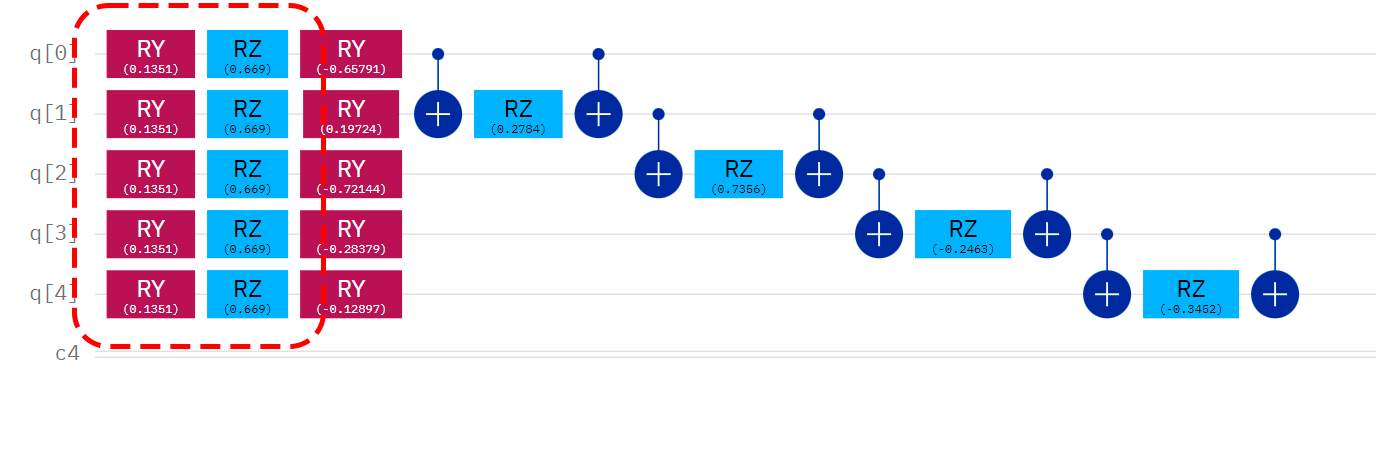

---



## I looked at what happens if you give each qubit a different value. This change corresponds to the model: "New generator basis". In the figure, you can see what I've changed.

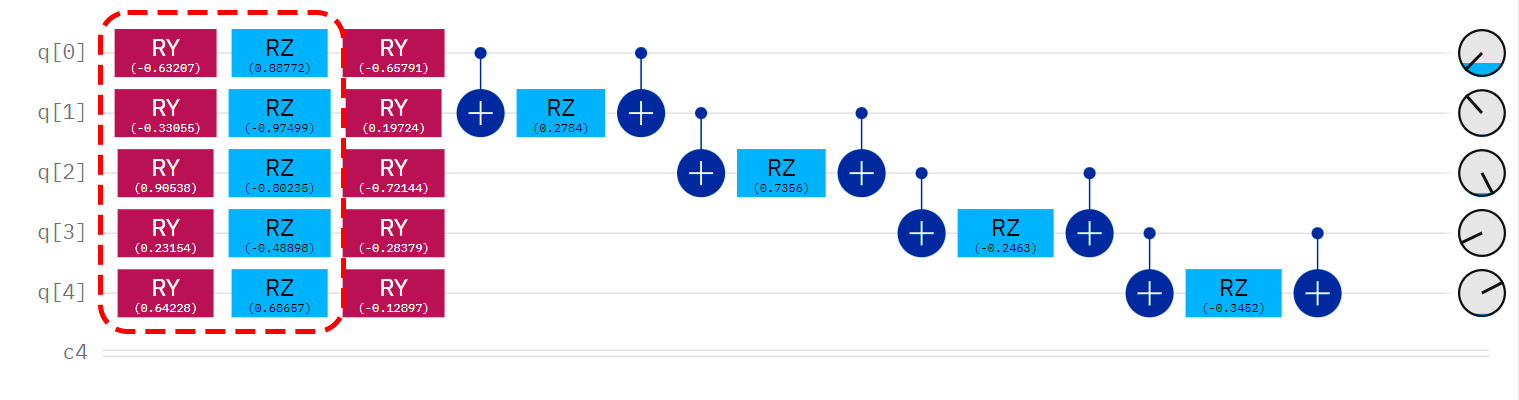

## This is where the playground begins.

## 2. I've decided to play for a bit and try to outperform starting model (spoiler alert, that didn't happen). Initially, I wanted to see if I needed to make this circuit so complicated, and based on the initial scheme, this is what I did ("Quantum circuit v1"):


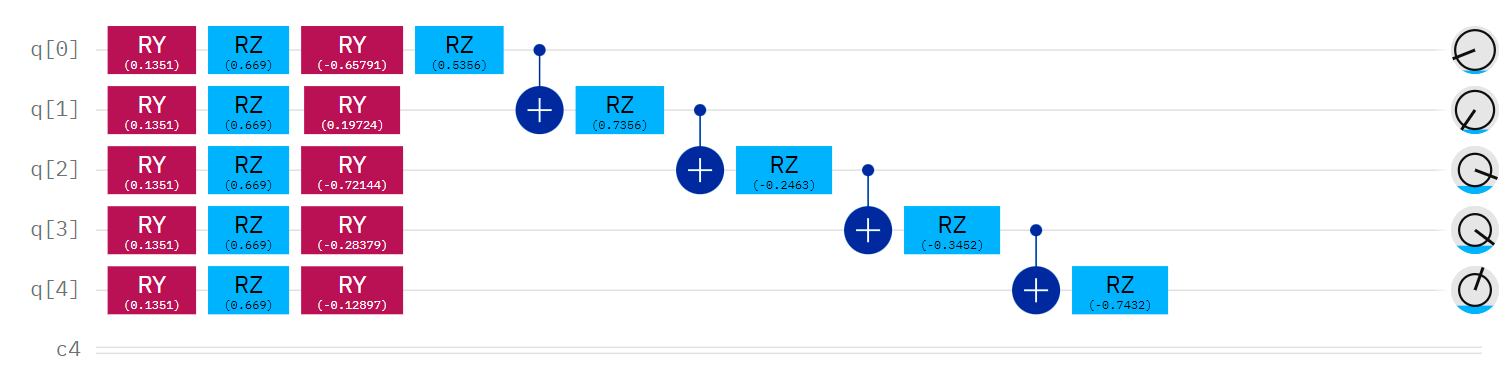

## 3. I've wanted to see do we really need CNOTs as in main circuit, so I/ve made some kind of triangle (see fig.), "Quantum circuit v2".

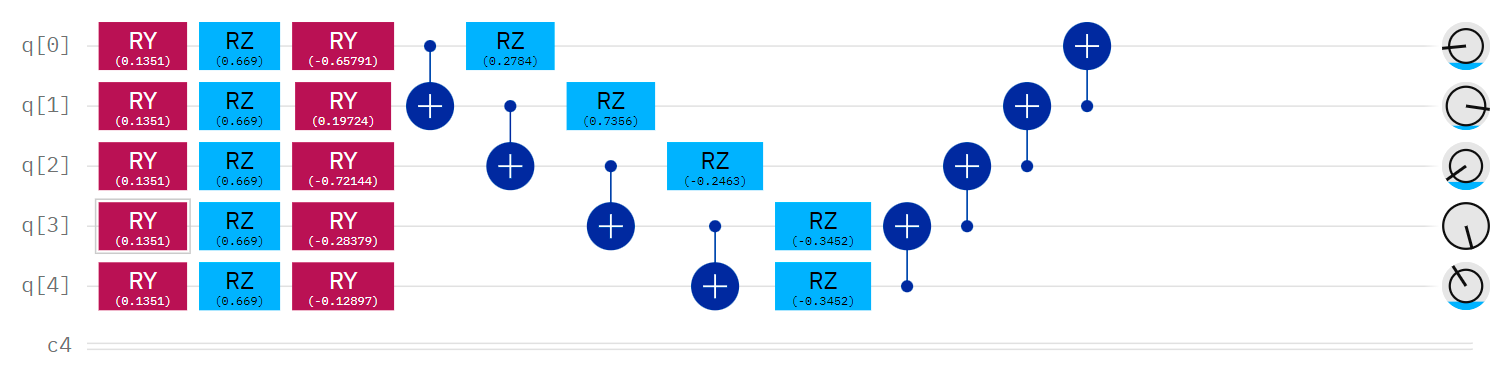

## 4. On the next attemt at making something usefull I've looked into some papers, describing quantum circuits (actually found some, that were just like one in the given article). Along with this I've found operator, that was new for me: double controlled-NOT gate or Toffoli gate. So I wanted to try it right away, model: "Quantum circuit v3".


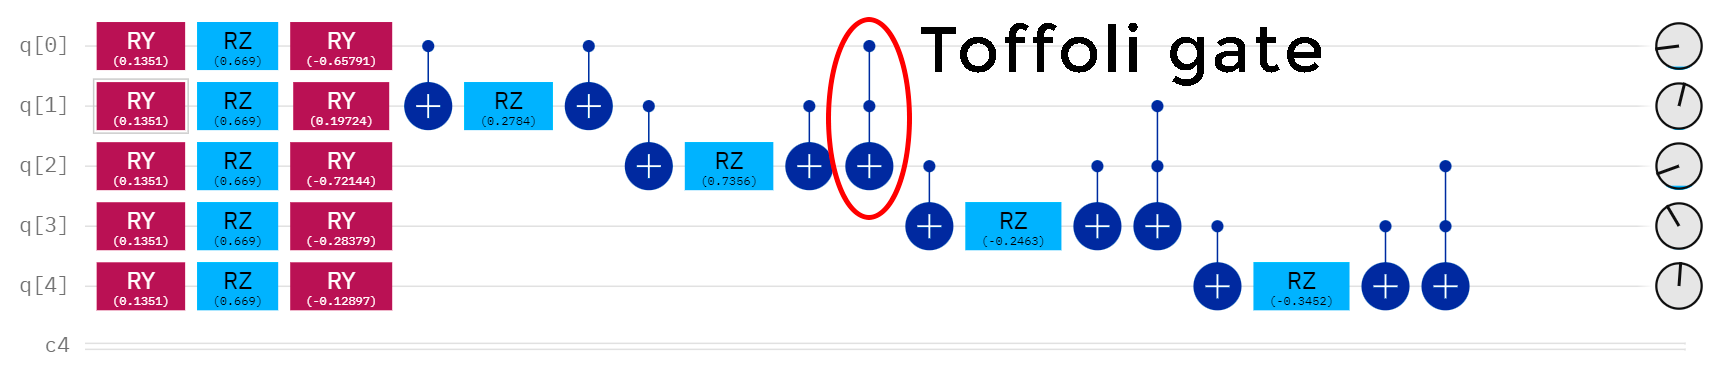

# A little bit of data analisys

## For the record. Lowest_indicies is saves of the model checkpoints with the lowest FD score. FD -- Fréchet Distance, which is a measure of similarity between curves (In our paper we have 2 matrices, consisting of 1-hot-vector representation of atom (nodes), and matrix of connection between atom (edges)). So FD in our example measures similarity between real and generated molecule distributions.

### In the next part I am plotting lowest inices of every model on the same figure.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

base_model = pd.read_csv (r'qgan-main-nr-q5-l2/models/lowest_indices_main.csv', header=None)
new_gen_model = pd.read_csv (r'qgan-gen-nr-q5-l2/models/lowest_indices_gen.csv', header=None)
model_v1 = pd.read_csv (r'qgan-v1-nr-q5-l2/models/lowest_indices_v1.csv', header=None)
model_v2 = pd.read_csv (r'qgan-v2-nr-q5-l2/models/lowest_indices_v2.csv', header=None)
model_v3 = pd.read_csv (r'qgan-v3-nr-q5-l2/models/lowest_indices_v3.csv', header=None)

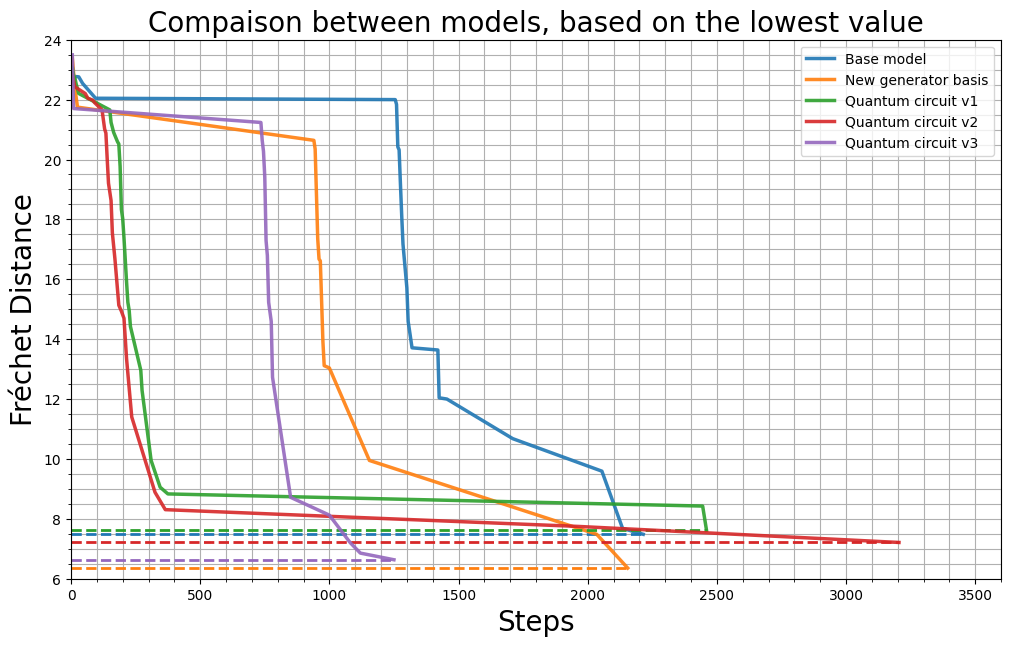

In [7]:
models = {'Base model': base_model,
          'New generator basis': new_gen_model,
          'Quantum circuit v1': model_v1,
          'Quantum circuit v2': model_v2,
          'Quantum circuit v3': model_v3,
          }

font = {'family' : 'normal',
        'size'   : 20}

plt.figure(figsize = (12,7), dpi = 100)
plt.axis([0, 3600, 6, 24])
plt.minorticks_on()
plt.grid(visible = True, which = 'major')
plt.grid(visible = True, which = 'minor')
plt.ylabel('Fréchet Distance', fontsize=20)
plt.xlabel(r'Steps', fontsize=20)
plt.title(r'Compaison between models, based on the lowest value', fontsize=20)

for label, model in models.items():
  p = plt.plot(model[0], model[1], label=label, linewidth=2.5, alpha=0.9)
  plt.hlines(model[1].iloc[-1], 0, model[0].iloc[-1], linestyle="dashed", color=p[0].get_color(), linewidth=2)


plt.legend();

### As we can see on of the lowest value has model with new generator base, followed by Quantum cicuit v1 and Base model, etc.

### However, let's also check FD on every step. First set of figures represent only atomic FD:

In [11]:
base_metric = pd.read_csv (r'qgan-main-nr-q5-l2/results/metric_main.csv', header=None)
new_gen_metric = pd.read_csv (r'qgan-gen-nr-q5-l2/results/metric_gen.csv', header=None)
metric_v1 = pd.read_csv (r'qgan-v1-nr-q5-l2/results/metric_v1.csv', header=None)
metric_v2 = pd.read_csv (r'qgan-v2-nr-q5-l2/results/metric_v2.csv', header=None)
metric_v3 = pd.read_csv (r'qgan-v3-nr-q5-l2/results/metric_v3.csv', header=None)

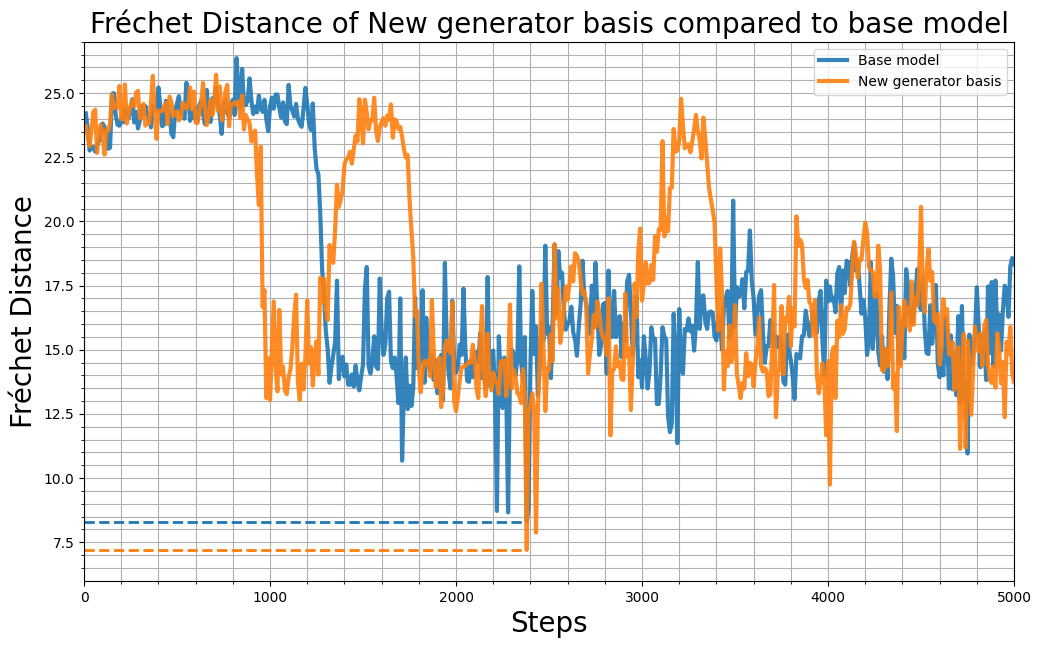

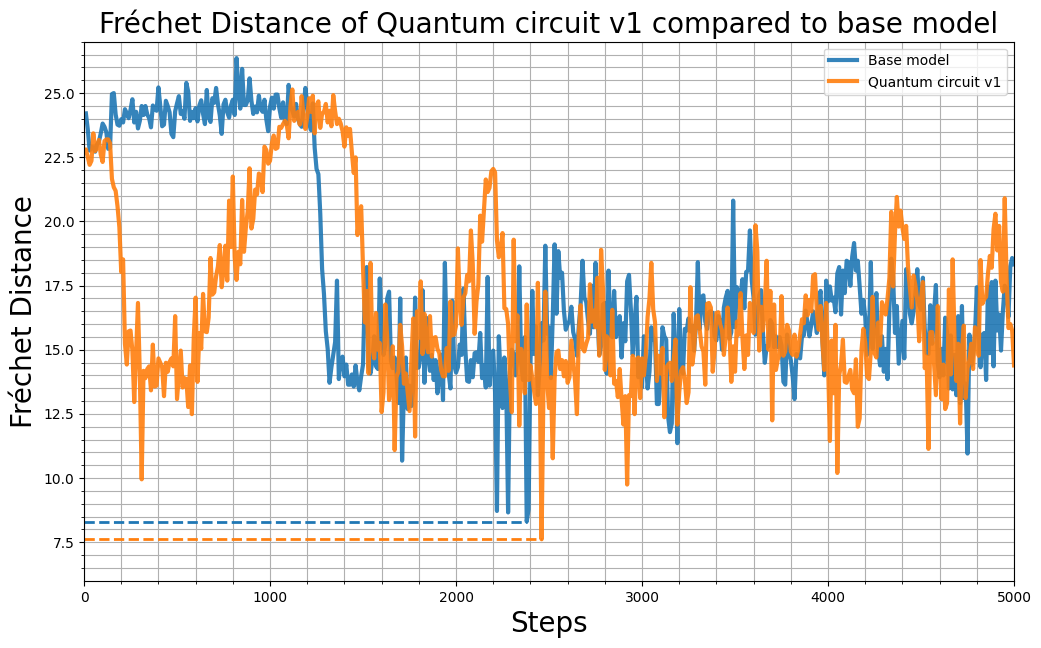

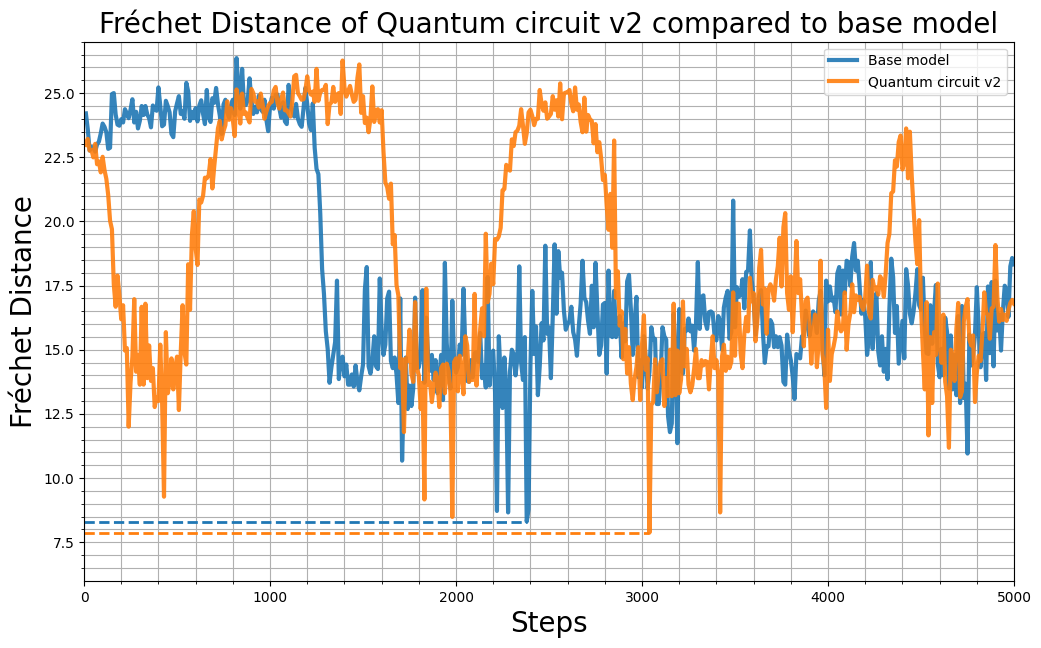

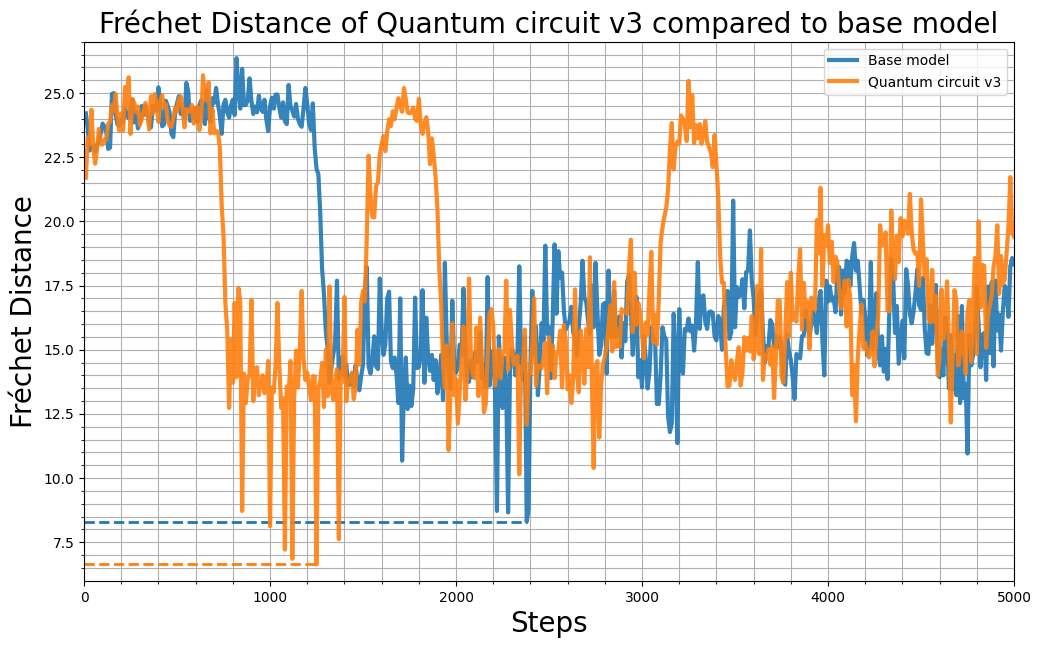

In [12]:
models = {'Base model': base_metric,
          'New generator basis': new_gen_metric,
          'Quantum circuit v1': metric_v1,
          'Quantum circuit v2': metric_v2,
          'Quantum circuit v3': metric_v3,
          }

for label, model in models.items():
  if label != 'Base model':
    plt.figure(figsize = (12,7), dpi = 100)
    plt.axis([0, 5000, 6, 27])
    plt.minorticks_on()
    plt.grid(visible = True, which = 'major')
    plt.grid(visible = True, which = 'minor')
    plt.ylabel('Fréchet Distance', fontsize=20)
    plt.xlabel(r'Steps', fontsize=20)
    plt.title('Fréchet Distance of {} compared to base model'.format(label), fontsize=20)
    p = plt.plot(base_metric[0], base_metric[10], label='Base model', alpha=0.9, linewidth=3)
    plt.hlines(base_metric[10].min(), 0, base_metric[0].iloc[base_metric[10].idxmin()], linestyle="dashed", color=p[0].get_color(), linewidth=2)
    p = plt.plot(model[0], model[10], label=label, alpha=0.9, linewidth=3)
    plt.hlines(model[10].min(), 0, model[0].iloc[model[10].idxmin()], linestyle="dashed", color=p[0].get_color(), linewidth=2)
    plt.legend();
    plt.show()



### So, from this plots, we can see, that at 5000-th step all of suggested models behave the identical way, however we can point out New generator base, that is lower than Main model at the end, that may actually mean that there is some potential of further training or just a lucky spike at the end.

### Other models are similar to the base model

## Next set consists only of bonds FD, and we can actually see correlations between atom FD ind bond FD, that means that there is an inherit connection between bonds and atoms

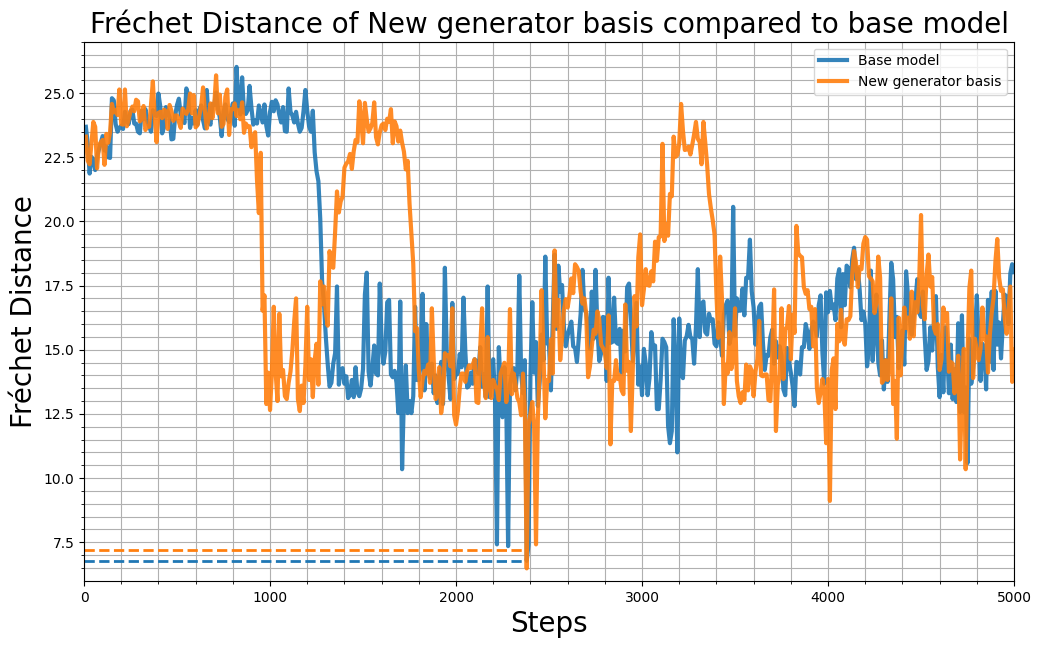

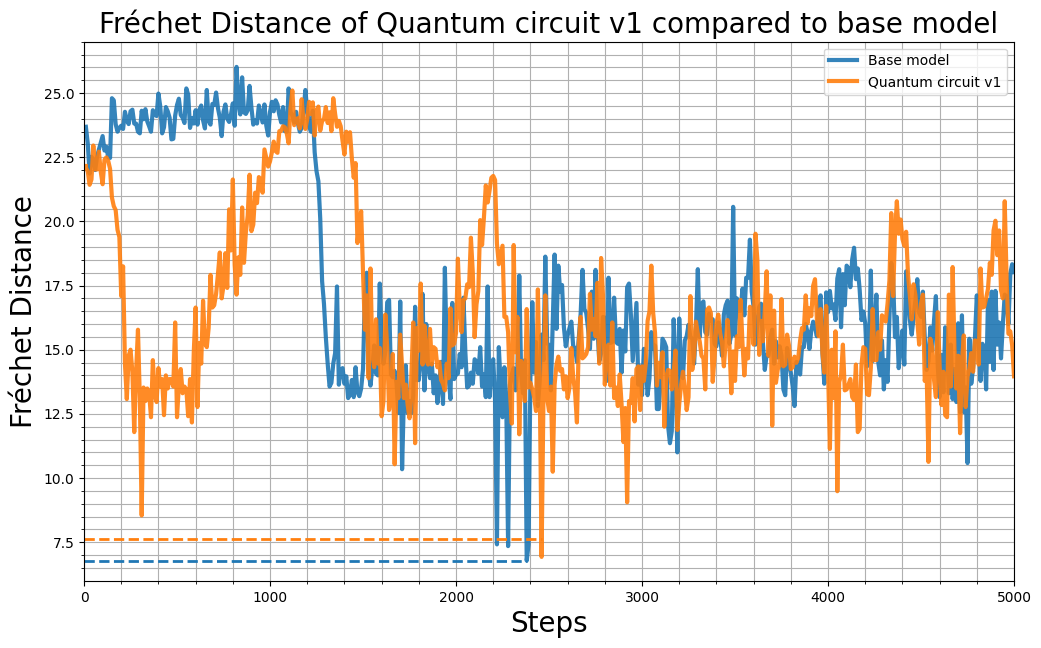

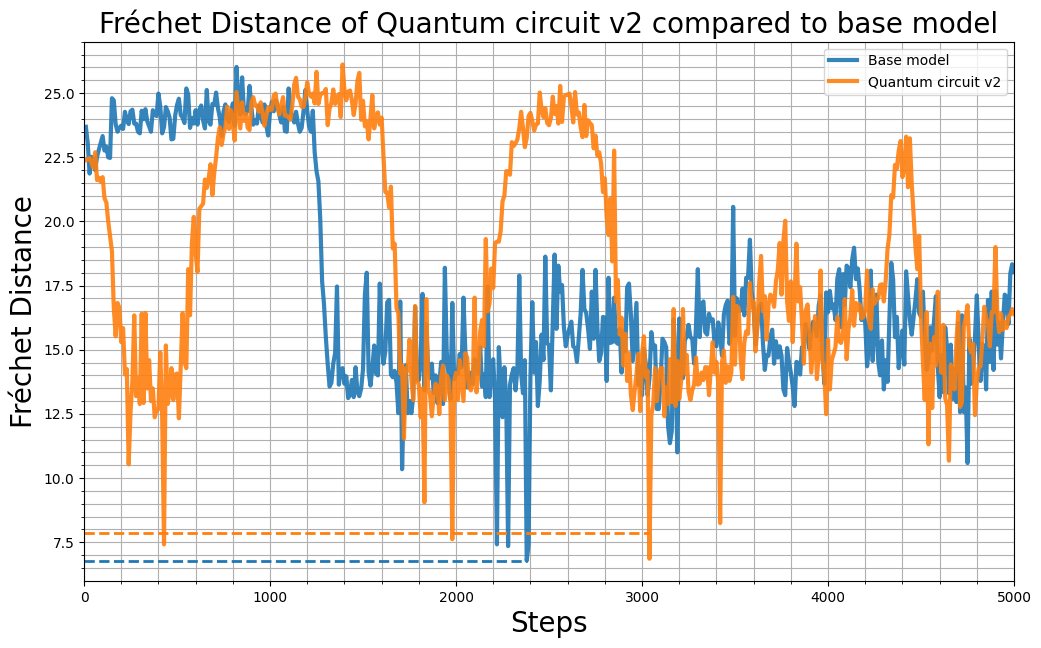

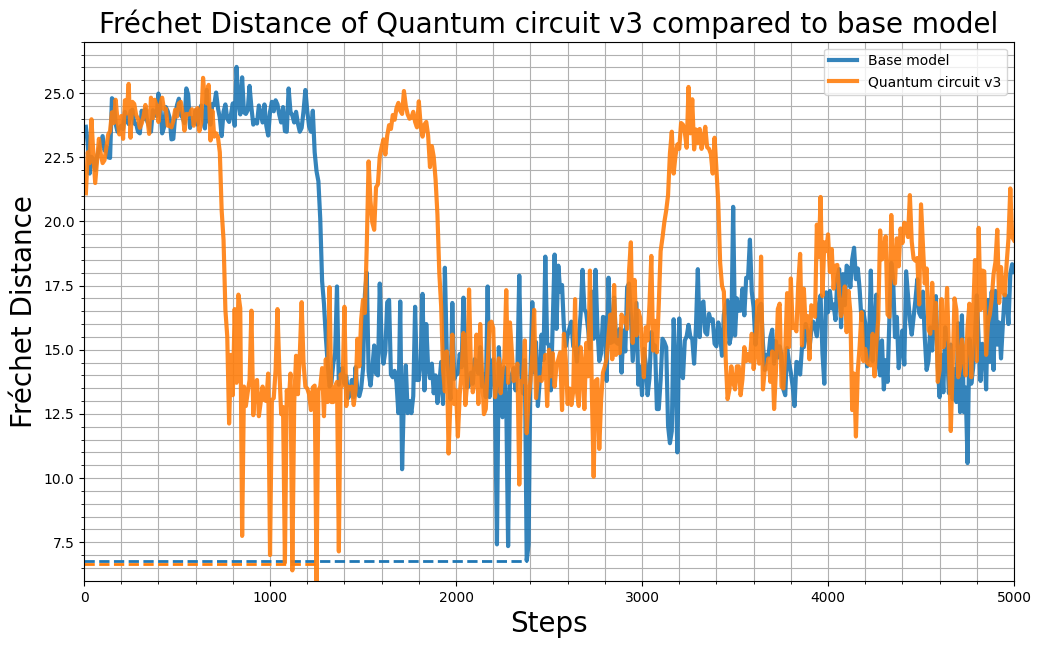

In [14]:
for label, model in models.items():
  if label != 'Base model':
    plt.figure(figsize = (12,7), dpi = 100)
    plt.axis([0, 5000, 6, 27])
    plt.minorticks_on()
    plt.grid(visible = True, which = 'major')
    plt.grid(visible = True, which = 'minor')
    plt.ylabel('Fréchet Distance', fontsize=20)
    plt.xlabel(r'Steps', fontsize=20)
    plt.title('Fréchet Distance of {} compared to base model'.format(label), fontsize=20)
    p = plt.plot(base_metric[0], base_metric[9], label='Base model', alpha=0.9, linewidth=3)
    plt.hlines(base_metric[9].min(), 0, base_metric[0].iloc[base_metric[9].idxmin()], linestyle="dashed", color=p[0].get_color(), linewidth=2)
    p = plt.plot(model[0], model[9], label=label, alpha=0.9, linewidth=3)
    plt.hlines(model[10].min(), 0, model[0].iloc[model[9].idxmin()], linestyle="dashed", color=p[0].get_color(), linewidth=2)
    plt.legend();
    plt.show()

### And for last we have a atoms + bonds FD, that is actually shows the same picture as previous two metrics.

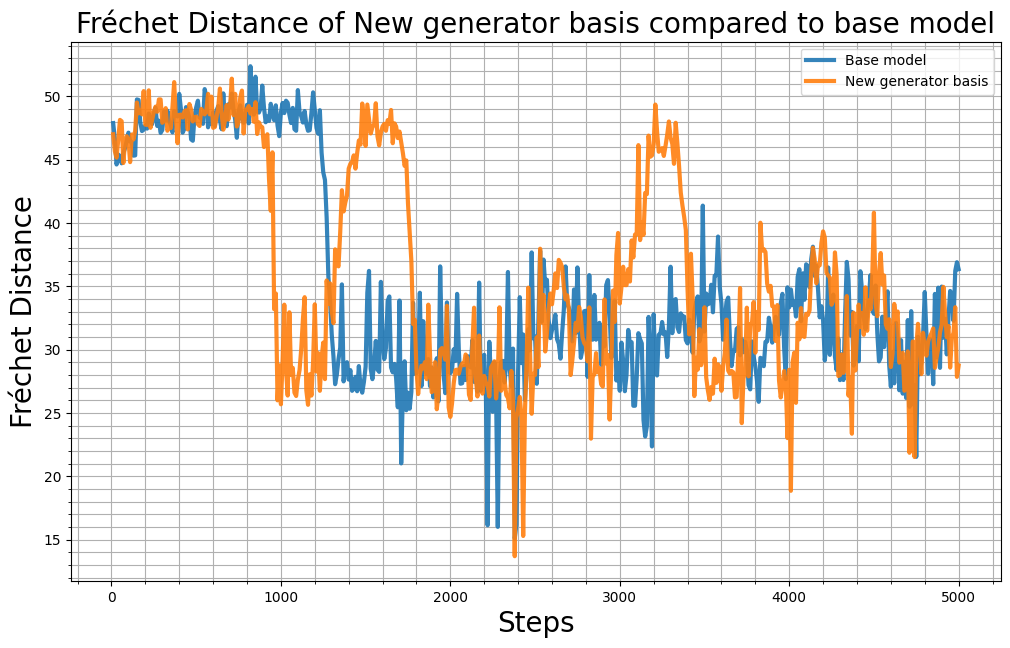

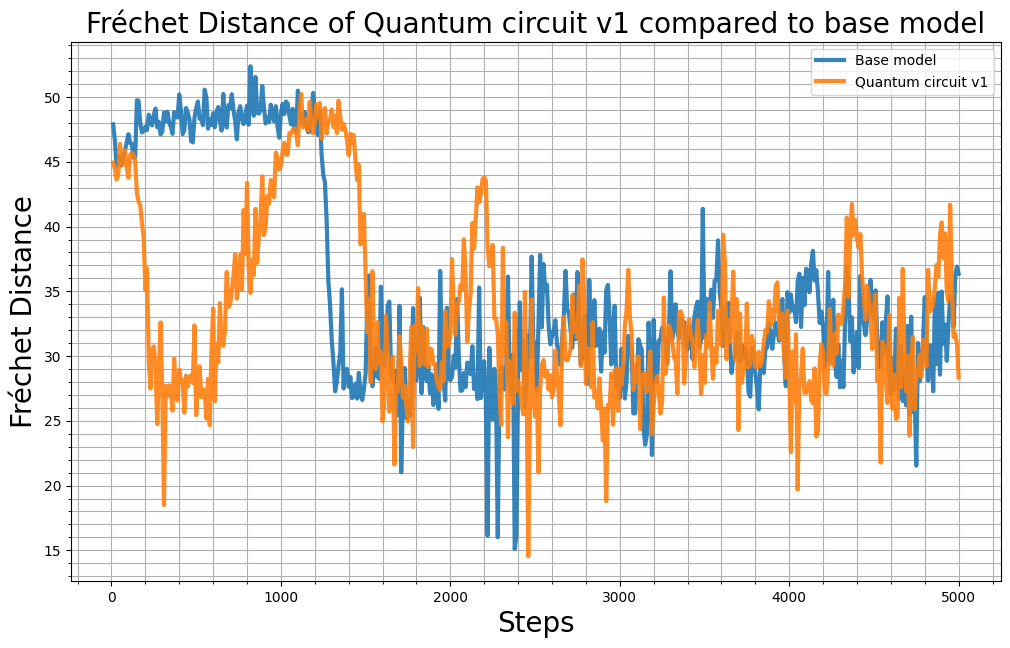

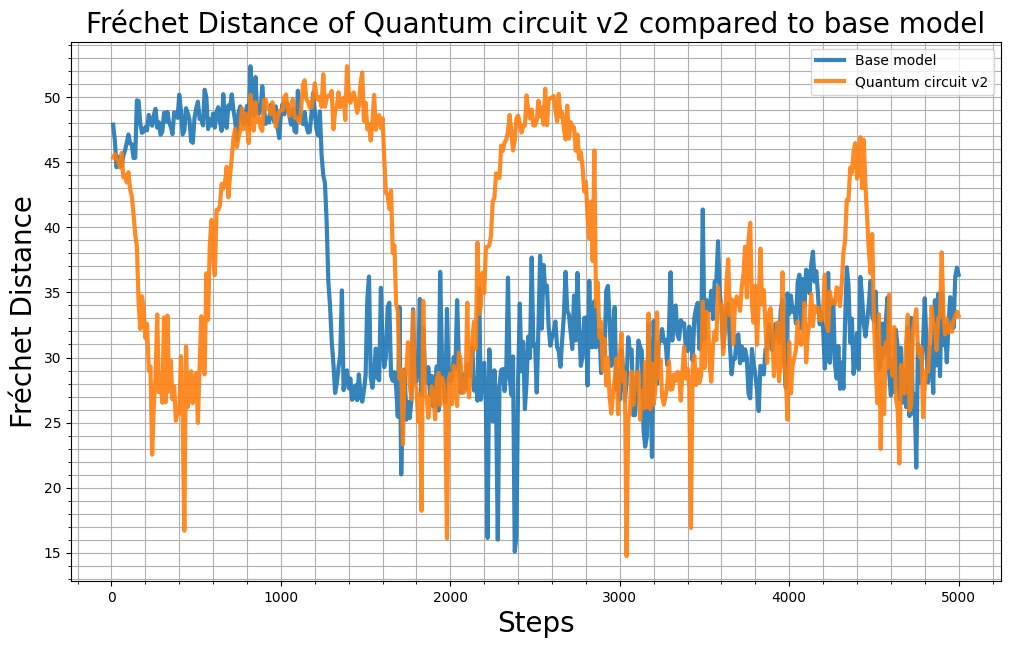

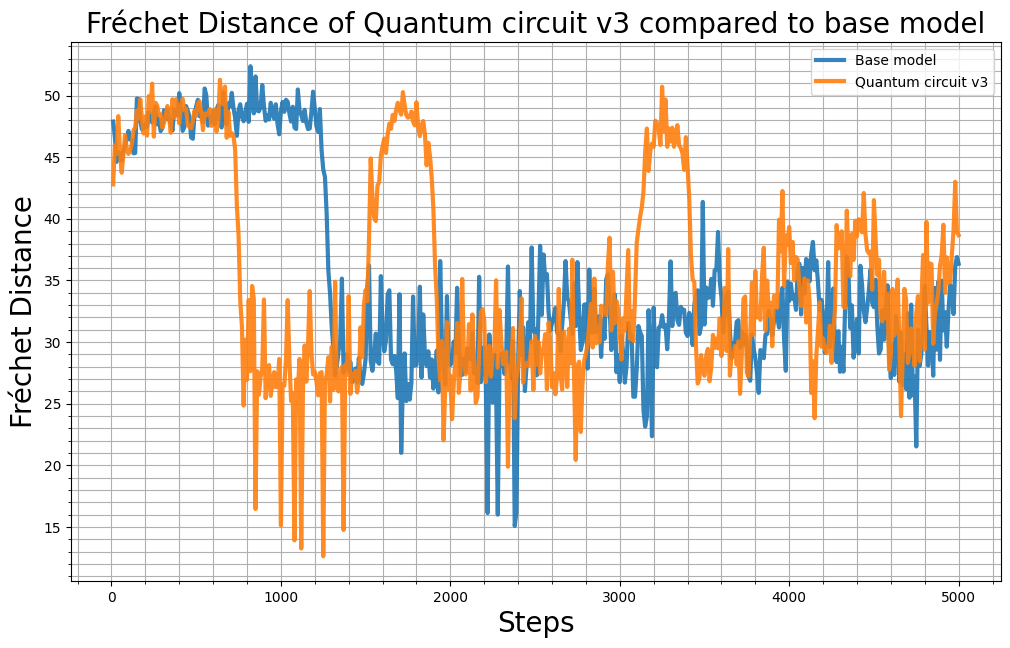

In [15]:
for label, model in models.items():
  if label != 'Base model':
    plt.figure(figsize = (12,7), dpi = 100)
    # plt.axis([0, 5000, 6, 27])
    plt.minorticks_on()
    plt.grid(visible = True, which = 'major')
    plt.grid(visible = True, which = 'minor')
    plt.ylabel('Fréchet Distance', fontsize=20)
    plt.xlabel(r'Steps', fontsize=20)
    plt.title('Fréchet Distance of {} compared to base model'.format(label), fontsize=20)
    p = plt.plot(base_metric[0], base_metric[9] + base_metric[10], label='Base model', alpha=0.9, linewidth=3)
    p = plt.plot(model[0], model[9] + model[10], label=label, alpha=0.9, linewidth=3)
    plt.legend();
    plt.show()